# 🖥️ Proyecto de Machine Learning para tienda Aurelion (Grupo # 6)

Proyecto de práctica para el bootcamp de fundamentos de Inteligencia Artificial impartido por GUAYERD

💡**Recomendación:**

Clonar directamente repositorio mediante `git clone https://github.com/jperez-xcvi/guayerd_ia` si se desea navegar entre ramas y explorar a detalle el avance del proyecto y las versiones de `aurelion.ipynb` de la manera más adecuada

📝**Notas de versión:**

1. En `2ndsprint` se encuentra la versión con el procesamiento de los dataset originalmente separados y teniendo en cuenta requisitos de entrega de segundo sprint (Ver `Documentacion.md` o `Documentacion.pdf`)
3. En `3rdsprint` se encuentra la aplicación de algoritmos de ML aplicables al caso utilizando el dataset unificado como resultado del sprint 2

## 1. Importación de Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import numpy as np

#Importación de librerías ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

## 2. Lectura de datos</h2>

In [2]:
current_dir = os.getcwd()
print("Current Directory:", current_dir)

Current Directory: d:\Proyectos\guayerd_ia


In [3]:
# Configuración de rutas base
data_location = "data"
data_path = os.path.join(current_dir, data_location)

# nombre de los archivos
file = "aurelion.csv"


# lectura del archivo
df_aurelion = pd.read_csv(os.path.join(data_path, file)) #dataframe clientes


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Tamaño de la muestra

In [4]:
#Forma del dataset
df_aurelion.shape

(343, 11)

Tenemos un dataset de 11 columnas y 343 registros

### 3.2 Visualización preliminar de los datos

In [5]:
#Visualización del dataframe
df_aurelion.head()

,fecha_venta,nombre_cliente,email_cliente,ciudad,fecha_alta,producto_comprado,categoria,cantidad,precio_unitario,importe,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,Toallas Húmedas x50,Limpieza,1,2902,2902,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Aceitunas Negras 200g,Alimentos,5,2394,11970,qr
2,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Helado Vainilla 1L,Alimentos,5,469,2345,qr
3,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Fernet 750ml,Licores,2,4061,8122,qr
4,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,Medialunas de Manteca,Alimentos,1,2069,2069,qr


### 3.3 Verificación y rectificación de validez de los datos (formatos o tipos)

In [6]:
#Verificación de tipos de datos
df_aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha_venta        343 non-null    object
 1   nombre_cliente     343 non-null    object
 2   email_cliente      343 non-null    object
 3   ciudad             343 non-null    object
 4   fecha_alta         343 non-null    object
 5   producto_comprado  343 non-null    object
 6   categoria          343 non-null    object
 7   cantidad           343 non-null    int64 
 8   precio_unitario    343 non-null    int64 
 9   importe            343 non-null    int64 
 10  medio_pago         343 non-null    object
dtypes: int64(3), object(8)
memory usage: 29.6+ KB


In [7]:
#Formateo de datos
df_aurelion['fecha_venta'] = pd.to_datetime(df_aurelion['fecha_venta'], format='%Y-%m-%d')
df_aurelion['fecha_alta'] = pd.to_datetime(df_aurelion['fecha_alta'], format='%Y-%m-%d')

In [8]:
# Reverificación de tipos de datos
df_aurelion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_venta        343 non-null    datetime64[ns]
 1   nombre_cliente     343 non-null    object        
 2   email_cliente      343 non-null    object        
 3   ciudad             343 non-null    object        
 4   fecha_alta         343 non-null    datetime64[ns]
 5   producto_comprado  343 non-null    object        
 6   categoria          343 non-null    object        
 7   cantidad           343 non-null    int64         
 8   precio_unitario    343 non-null    int64         
 9   importe            343 non-null    int64         
 10  medio_pago         343 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 29.6+ KB


### 3.4 Completitud de los datos

In [9]:
#Exploración de valores nulos
df_aurelion.isnull().sum()

fecha_venta          0
nombre_cliente       0
email_cliente        0
ciudad               0
fecha_alta           0
producto_comprado    0
categoria            0
cantidad             0
precio_unitario      0
importe              0
medio_pago           0
dtype: int64

### 3.5 Estadística descriptiva

#### 3.5.1 Medidas de tendencia central y dispersión

In [10]:
#Estadística básica de variables numéricas
df_aurelion.describe(include=['int64'])

,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


In [11]:
#descriptiva de variables categóricas
df_aurelion.describe(include=['object'])

,nombre_cliente,email_cliente,ciudad,producto_comprado,categoria,medio_pago
count,343,343,343,343,343,343
unique,64,67,6,95,3,4
top,Agustina Flores,agustina.flores@mail.com,Rio Cuarto,Queso Rallado 150g,Alimentos,efectivo
freq,15,15,104,9,286,111


#### 3.5.2 Distribuciones

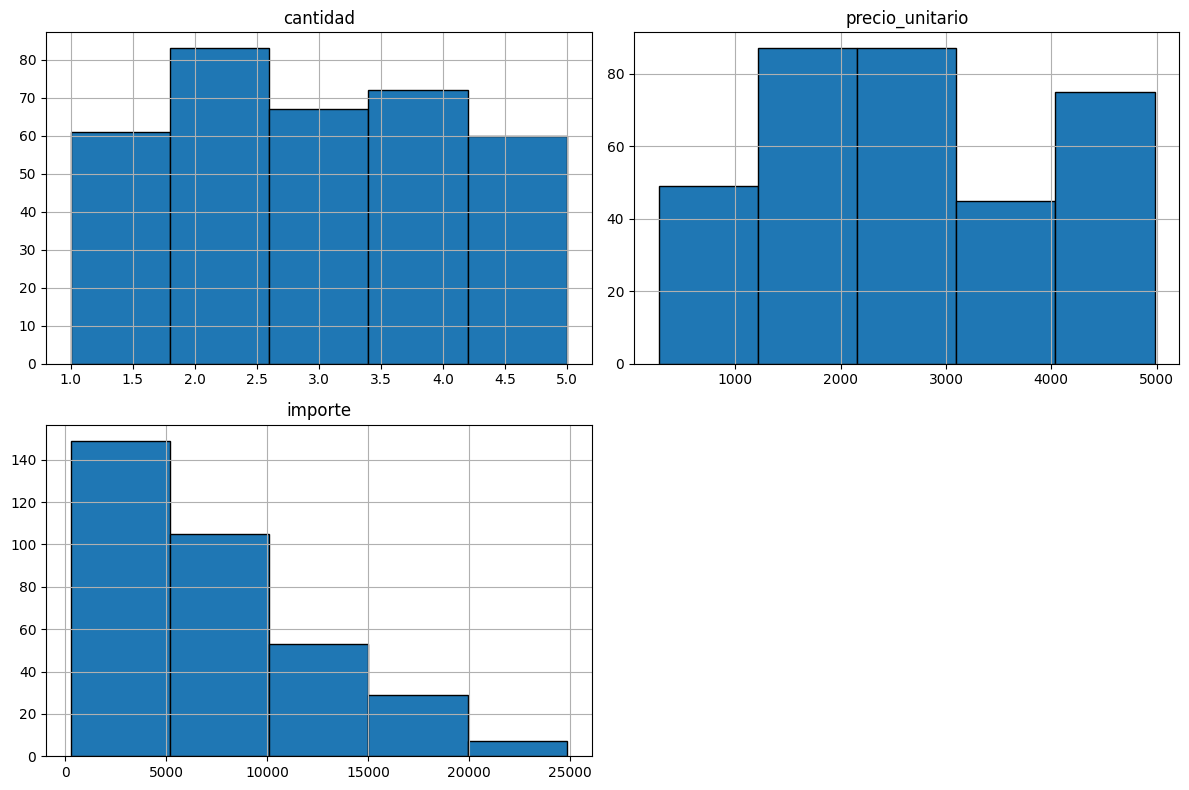

In [12]:
#Distribuciones
numeric=df_aurelion.select_dtypes(include=['int64', 'float64'])
numeric.hist(bins=5, figsize=(12, 8),edgecolor='black')
plt.tight_layout()
plt.show()

#### 3.5.3 Correlaciones

##### 3.5.3.1 Pearson

In [13]:
#Correlaciones
#matriz de correlación
pearson_corr = numeric.corr()
pearson_corr

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.074483,0.599723
precio_unitario,-0.074483,1.000000,0.679298
importe,0.599723,0.679298,1.000000


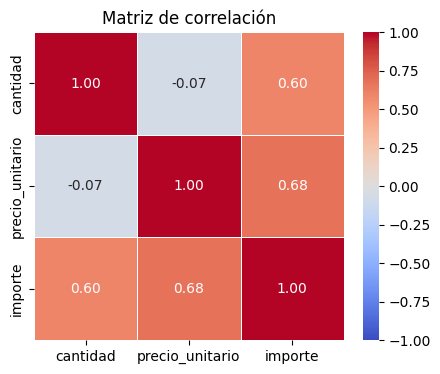

In [14]:
#Matriz de correlación visualizada (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

##### 3.5.3.2 Spearman

In [15]:
spearman_corr = numeric.corr(method='spearman')
spearman_corr

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.070706,0.610693
precio_unitario,-0.070706,1.000000,0.698172
importe,0.610693,0.698172,1.000000


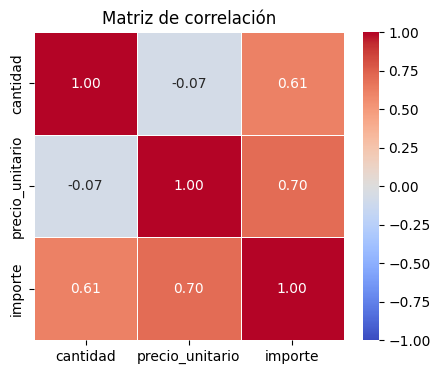

In [16]:
#Matriz de correlación visualizada (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

##### 3.5.3.3 Kendall

In [17]:
kendall_corr = numeric.corr(method='kendall')
kendall_corr

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.050937,0.480092
precio_unitario,-0.050937,1.000000,0.527300
importe,0.480092,0.527300,1.000000


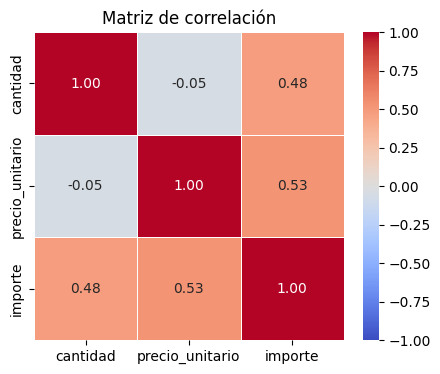

In [18]:
#Matriz de correlación visualizada (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

#### 3.5.4 Valores atípicos

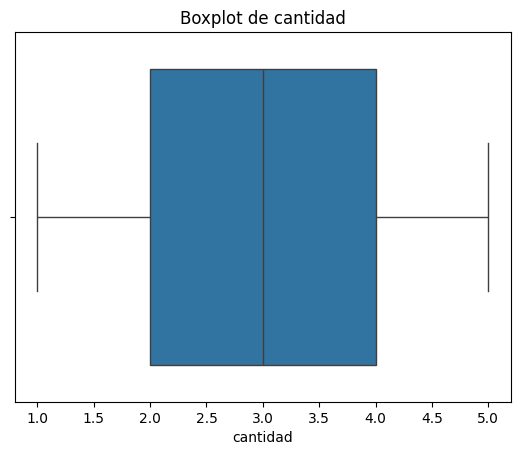

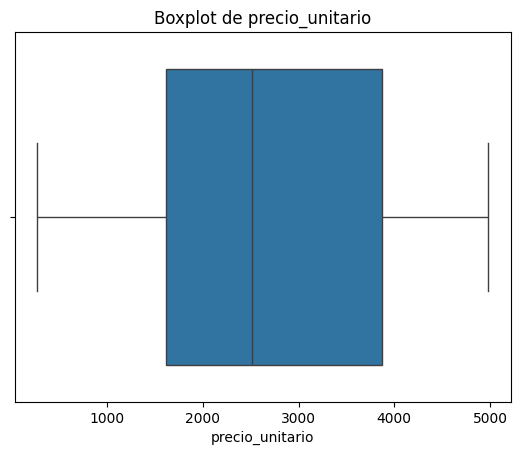

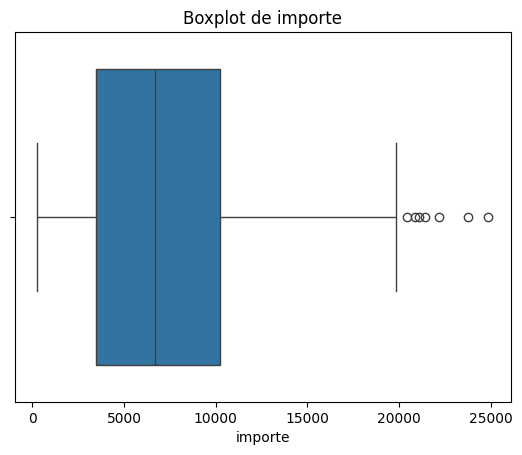

In [19]:
#Valores atípicos (boxplots)
for col in numeric.columns:
    plt.figure()
    sns.boxplot(x=numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

<p>De lo boxplots podemos notar valores atípicos en la variable de importe, los valores atípicos pueden sesgar análisis estadísticos y afectar la precisión de modelos
</p>

In [20]:
# Cuartiles de importe
importe_Q1 = df_aurelion['importe'].quantile(0.25)
importe_Q2 = df_aurelion['importe'].quantile(0.50)
importe_Q3 = df_aurelion['importe'].quantile(0.75)
importe_IQR = importe_Q3 - importe_Q1
importe_limite_superior = importe_Q3 + 1.5 * importe_IQR
importe_limite_inferior = importe_Q1 - 1.5 * importe_IQR

print(f"Importe Q1: {importe_Q1}")
print(f"Importe Q2 (Mediana): {importe_Q2}")
print(f"Importe Q3: {importe_Q3}")
print(f"Importe IQR: {importe_IQR}")
print(f"Importe Límite Superior: {importe_limite_superior}")

Importe Q1: 3489.0
Importe Q2 (Mediana): 6702.0
Importe Q3: 10231.5
Importe IQR: 6742.5
Importe Límite Superior: 20345.25


In [21]:
# Identificación de outliers
outliers = df_aurelion['importe'] > importe_limite_superior
aurelion_outliers = df_aurelion[outliers]
aurelion_outliers.shape


(7, 11)

<p> de los 343 registros que tenemos 7 son aquellos outliers visualizados en el boxplot</p>

In [22]:
aurelion_outliers[['nombre_cliente', 'importe', 'fecha_venta']]

,nombre_cliente,importe,fecha_venta
41,Nicolas Rojas,22150,2024-04-12
54,Karina Acosta,21430,2024-06-19
141,Bruno Castro,23760,2024-01-09
175,Karina Castro,21090,2024-06-19
208,Guadalupe Martinez,24865,2024-05-23
260,Elena Rodriguez,20450,2024-03-06
308,Mariana Rodriguez,20850,2024-05-19


### 3.6 Analítica descriptiva del negocio

En esta sección se recopila misceláneo de visualizaciones de los datos de la tienda Aurelion que puedan brindar hallazgos de interés para el negocio

C:\Users\Admin\AppData\Local\Temp\ipykernel_2320\2712062449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')


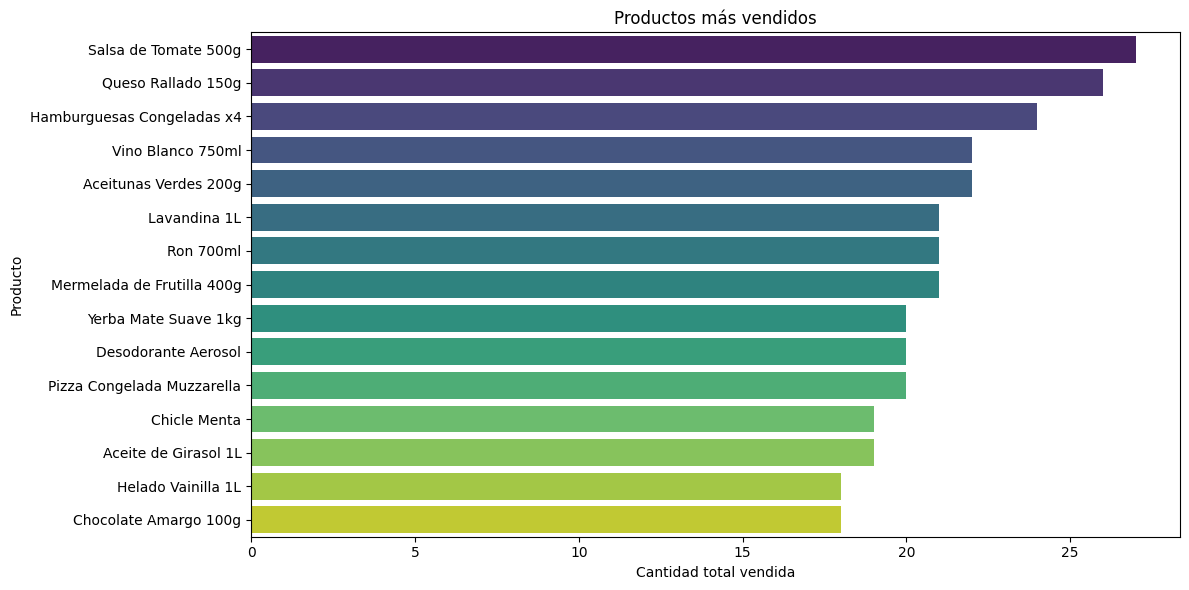

In [23]:
# Top 15 productos más vendidos
ventas_por_producto = df_aurelion.groupby('producto_comprado')['cantidad'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='cantidad', y='producto_comprado', data=ventas_por_producto.head(15), palette='viridis')
plt.title('Productos más vendidos')
plt.xlabel('Cantidad total vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Productos con menor rotación:
           producto_comprado  cantidad
85               Vodka 700ml         4
86              Manteca 200g         4
87       Porotos Negros 500g         3
88            Miel Pura 250g         3
89        Yogur Natural 200g         3
90          Maní Salado 200g         3
91  Detergente Líquido 750ml         2
92  Chocolate con Leche 100g         2
93            Alfajor Triple         2
94       Galletitas Vainilla         2


C:\Users\Admin\AppData\Local\Temp\ipykernel_2320\2541629586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')


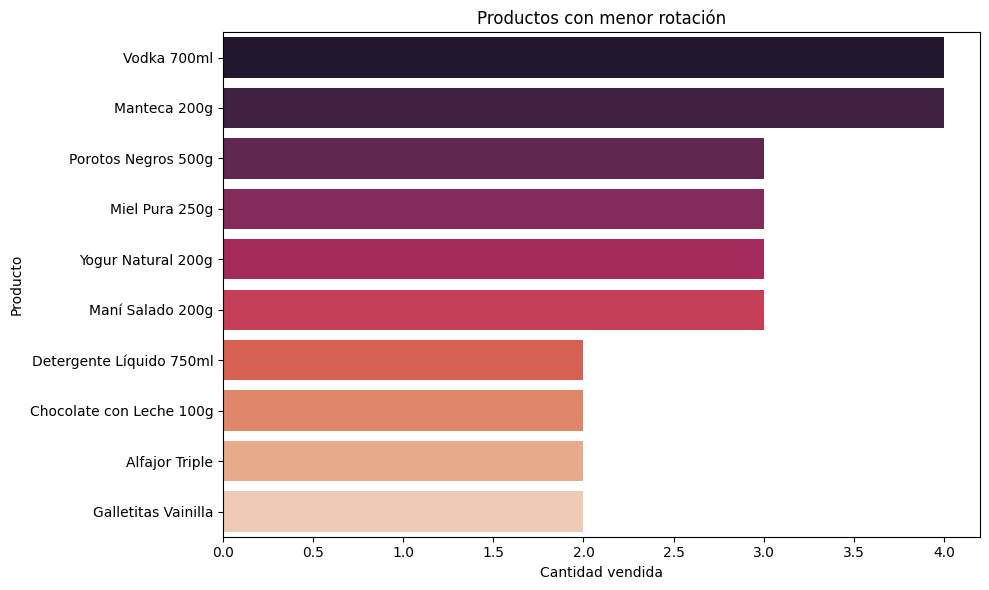

In [24]:
productos_menos_vendidos = ventas_por_producto.tail(10)
print("Productos con menor rotación:")
print(productos_menos_vendidos)

plt.figure(figsize=(10,6))
sns.barplot(x='cantidad', y='producto_comprado', data=productos_menos_vendidos, palette='rocket')
plt.title('Productos con menor rotación')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

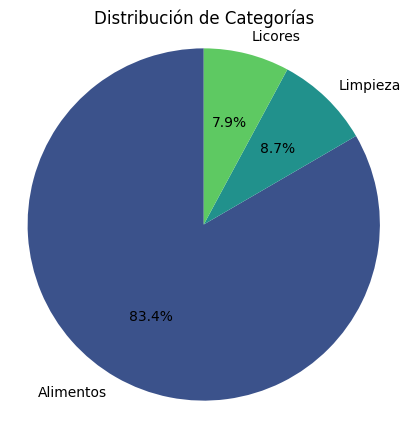

In [25]:
# Extracción y conteo por categoría
counts = df_aurelion['categoria'].value_counts()
labels = counts.index

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(counts))

# Impresión del gráfico usando la paleta
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette)
plt.axis('equal')
plt.title('Distribución de Categorías')
plt.show()

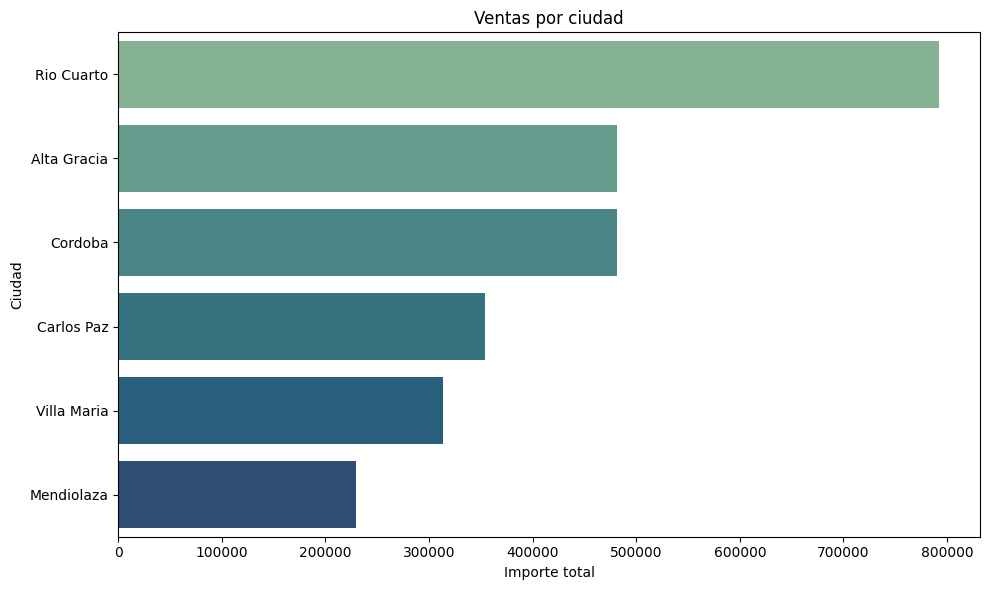

In [26]:
ventas_ciudad = df_aurelion.groupby('ciudad')['importe'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='ciudad', data=ventas_ciudad, palette='crest', hue='ciudad', legend=False)
plt.title('Ventas por ciudad')
plt.xlabel('Importe total')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

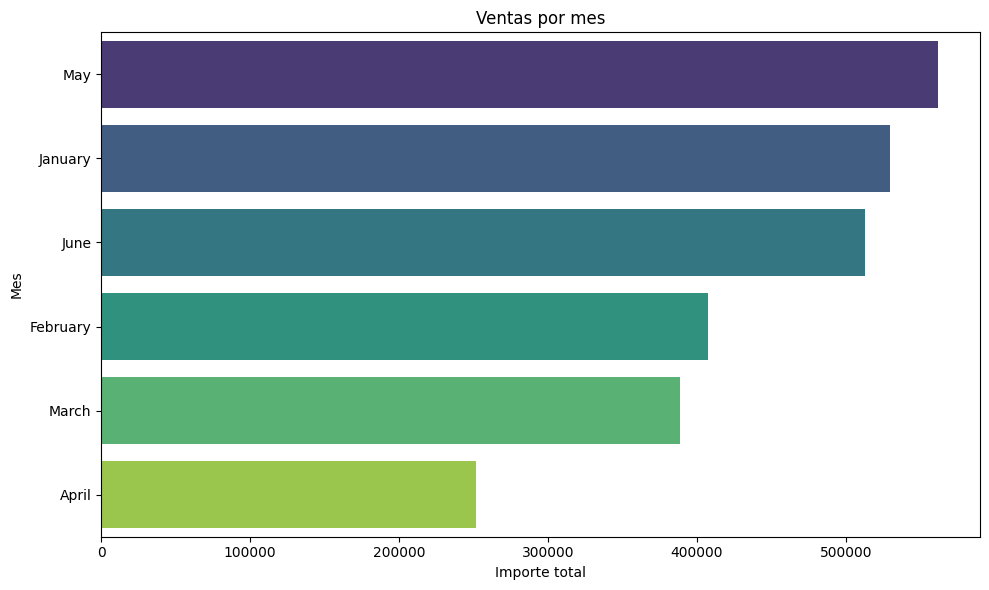

In [27]:
df_aurelion['mes'] = df_aurelion['fecha_venta'].dt.month_name()

ventas_mes = df_aurelion.groupby('mes')['importe'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='importe', y='mes', data=ventas_mes, palette='viridis', hue='mes', legend=False)
plt.title('Ventas por mes')
plt.xlabel('Importe total')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

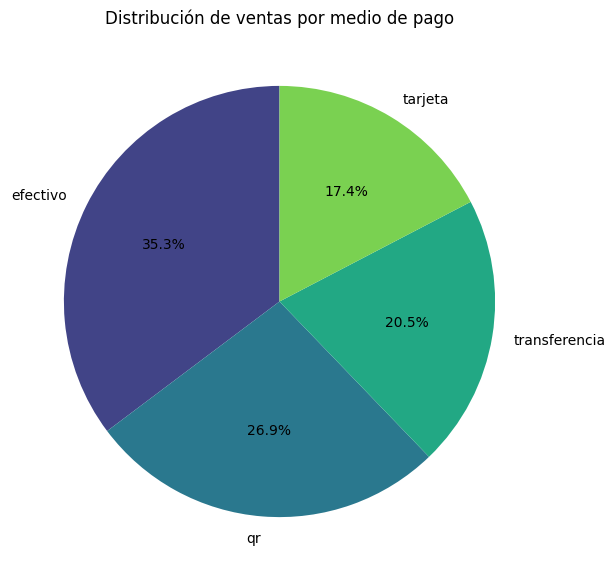

In [28]:
ventas_medio_pago = df_aurelion.groupby('medio_pago')['importe'].sum().sort_values(ascending=False).reset_index()

# Configuración de paletta (guía de paletas: 'viridis', 'magma', 'pastel', 'Set3', 'tab10')
palette = sns.color_palette('viridis', n_colors=len(ventas_medio_pago))

plt.figure(figsize=(7,7))
plt.pie(ventas_medio_pago['importe'], labels=ventas_medio_pago['medio_pago'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Distribución de ventas por medio de pago')
plt.show()

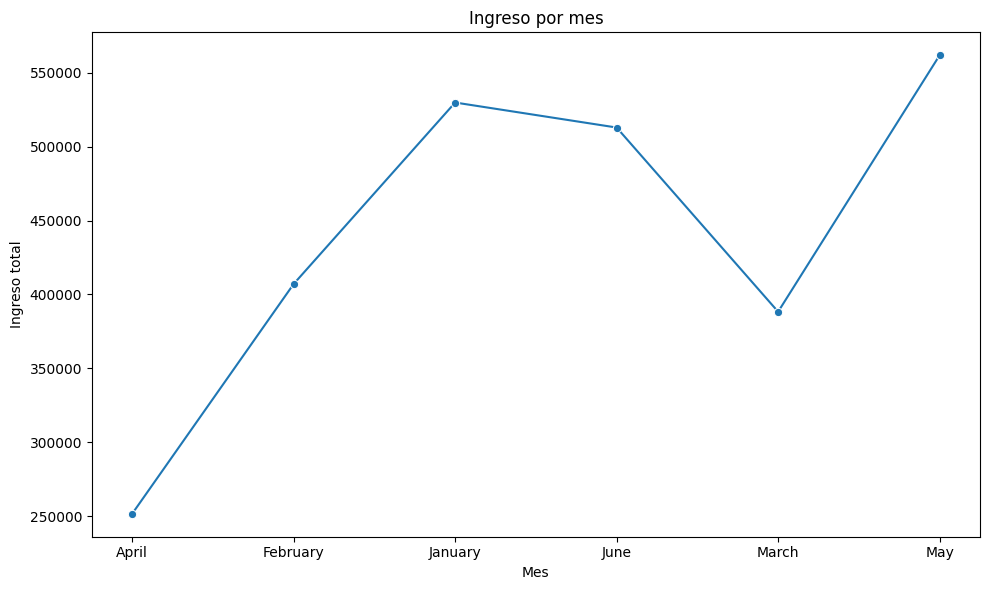

In [29]:
# grafico linea ingreso por mes
ventas_mes_linea = df_aurelion.groupby('mes')['importe'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='mes', y='importe', data=ventas_mes_linea, marker='o')
plt.title('Ingreso por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso total')
plt.tight_layout()
plt.show()

        nombre_cliente       importe
44       Nicolas Rojas  22150.000000
63       Yamila Molina  13946.666667
43       Martina Perez  13845.666667
25  Guadalupe Martinez  13591.800000
19         Felipe Ruiz  13457.000000
41   Mariana Rodriguez  12216.750000
16       Felipe Castro  12213.000000
4         Bruno Castro  11879.000000
14      Emilia Alvarez  11566.000000
30        Ivana Medina  10868.750000


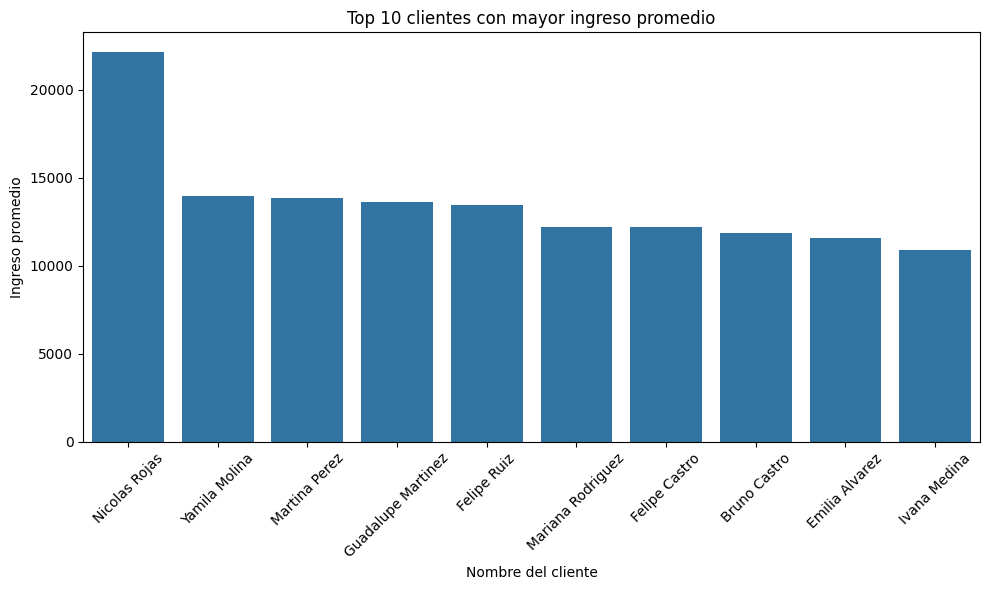

In [30]:
# promedio de ingresos por cliente
promedio_ingreso_cliente = df_aurelion.groupby('nombre_cliente')['importe'].mean().reset_index()
promedio_ingreso_cliente = promedio_ingreso_cliente.sort_values(by='importe', ascending=False)
print(promedio_ingreso_cliente.head(10))

#barra de los 10 clientes con mayor ingreso promedio
plt.figure(figsize=(10,6))
sns.barplot(x='nombre_cliente', y='importe', data=promedio_ingreso_cliente.head(10))
plt.title('Top 10 clientes con mayor ingreso promedio')
plt.xlabel('Nombre del cliente')
plt.ylabel('Ingreso promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        nombre_cliente  importe
0      Agustina Flores   132158
4         Bruno Castro   118790
5           Bruno Diaz    90701
10          Diego Diaz    90522
37       Karina Castro    81830
40       Mariana Lopez    72448
45        Olivia Gomez    71321
25  Guadalupe Martinez    67959
48       Pablo Sanchez    67575
7     Camila Rodriguez    65001


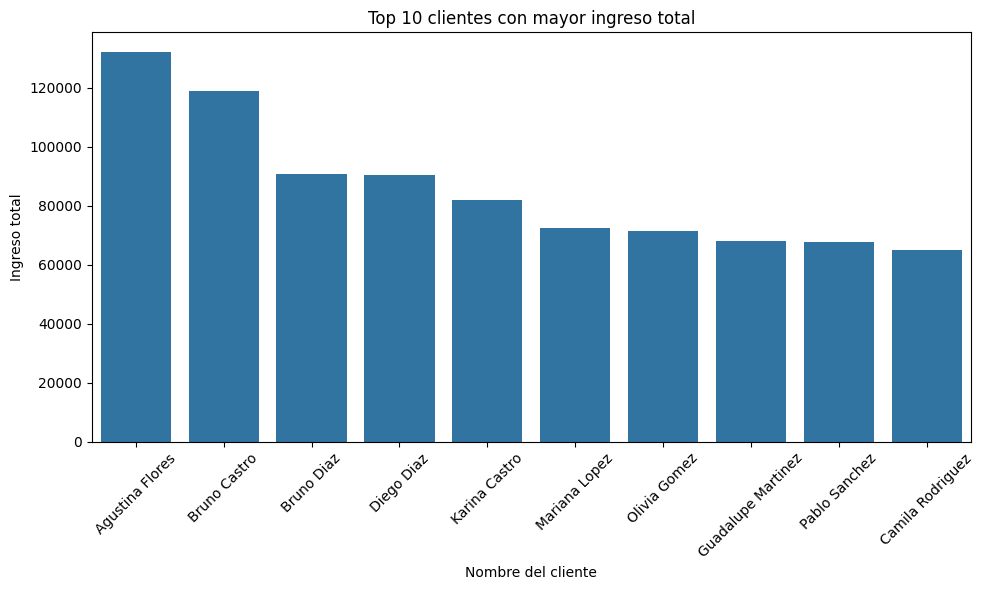

In [31]:
# Ingresos por cliente total
ingreso_total_cliente = df_aurelion.groupby('nombre_cliente')['importe'].sum().reset_index()
ingreso_total_cliente = ingreso_total_cliente.sort_values(by='importe', ascending=False)
print(ingreso_total_cliente.head(10))

#barra de los 10 clientes con mayor ingreso total
plt.figure(figsize=(10,6))
sns.barplot(x='nombre_cliente', y='importe', data=ingreso_total_cliente.head(10))
plt.title('Top 10 clientes con mayor ingreso total')
plt.xlabel('Nombre del cliente')
plt.ylabel('Ingreso total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Sección de aplicación de algoritmos de Machine Learning 

In [32]:
# 4.1 Segmentación de clientes con KMeans (RFM)
# Calcular RFM por cliente
# Referencia de fecha: última fecha de venta en dataset
# extracción de dataset sin outliers
df_limpio = df_aurelion[~outliers].copy()
    
reference_date = df_limpio['fecha_venta'].max() + pd.Timedelta(days=1)

# Crear tabla RFM
rfm = df_limpio.groupby('nombre_cliente').agg({
    'fecha_venta': lambda x: (reference_date - x.max()).days,  # Recency (días desde última compra)
    'nombre_cliente': 'count',  # Frequency (número de transacciones)
    'importe': 'sum'  # Monetary (suma de importes)
}).rename(columns={
    'fecha_venta': 'recency',
    'nombre_cliente': 'frequency',
    'importe': 'monetary'
}).reset_index()

rfm.head()

,nombre_cliente,recency,frequency,monetary
0,Agustina Flores,4,15,132158
1,Agustina Gomez,108,2,9800
2,Agustina Lopez,59,5,29883
3,Agustina Martinez,96,3,18292
4,Bruno Castro,171,9,95030


In [33]:
rfm.shape

(63, 4)

In [34]:
rfm.describe()

,recency,frequency,monetary
count,63.000000,63.000000,63.000000
mean,72.936508,5.333333,39632.095238
std,52.381933,2.923762,24438.268094
min,1.000000,1.000000,4283.000000
25%,24.000000,3.000000,22201.000000
50%,61.000000,5.000000,34326.000000
75%,116.500000,7.000000,51673.000000
max,171.000000,15.000000,132158.000000


In [35]:
# Preparar datos para KMeans (normalización)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

print('Datos normalizados (primeras 5 filas):')
rfm_scaled[:5]

Datos normalizados (primeras 5 filas):


array([[-1.32660672,  3.3327987 ,  3.81651827],
       [ 0.67475806, -1.14924093, -1.23051741],
       [-0.26819265, -0.11492409, -0.40213171],
       [ 0.44383135, -0.80446865, -0.8802385 ],
       [ 1.88712325,  1.26416502,  2.28505861]])

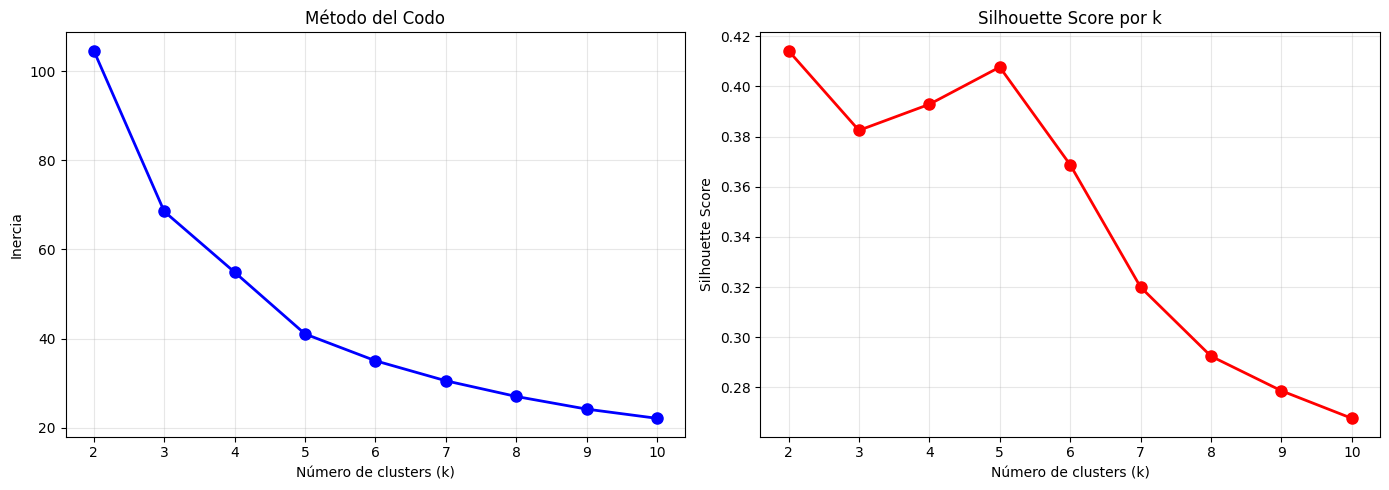

In [36]:
# Determinar número óptimo de clusters (método del codo)
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(rfm_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans_temp.labels_))

# Visualizar método del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de inercia
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de clusters (k)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Método del Codo')
axes[0].grid(True, alpha=0.3)

# Gráfico de silhouette
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score por k')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== KMeans aplicado con k=5 ===
Silhouette Score: 0.4077
Davies-Bouldin Index: 0.8071

Distribución de clientes por cluster:
cluster
0    22
1    12
2     3
3     6
4    20
Name: count, dtype: int64

=== Perfil de cada cluster ===
            recency                  frequency                      monetary  \
               mean median min  max       mean median min max           mean   
cluster                                                                        
0        124.454545  124.0  92  169   3.227273    3.0   1   6   23425.090909   
1         31.083333   26.0  10   69   7.750000    8.0   6  10   56831.333333   
2         12.666667    4.0   2   32  12.000000   11.0  10  15  104460.333333   
3        127.166667  126.0  95  171   9.000000    8.5   7  13   65942.333333   
4         34.150000   34.5   1   80   4.100000    4.0   2   7   29522.950000   

                                 
          median    min     max  
cluster                          
0        20184.5   4283  

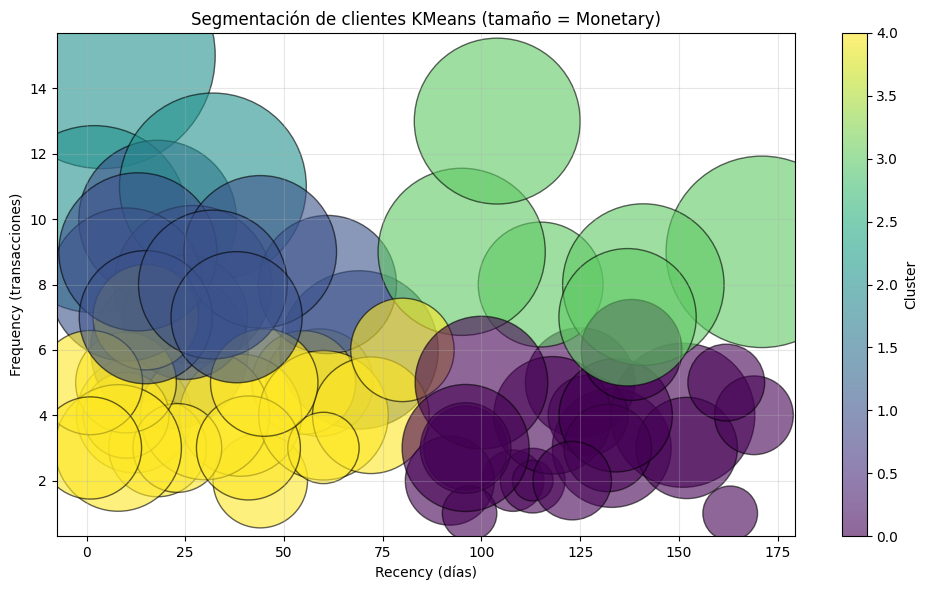

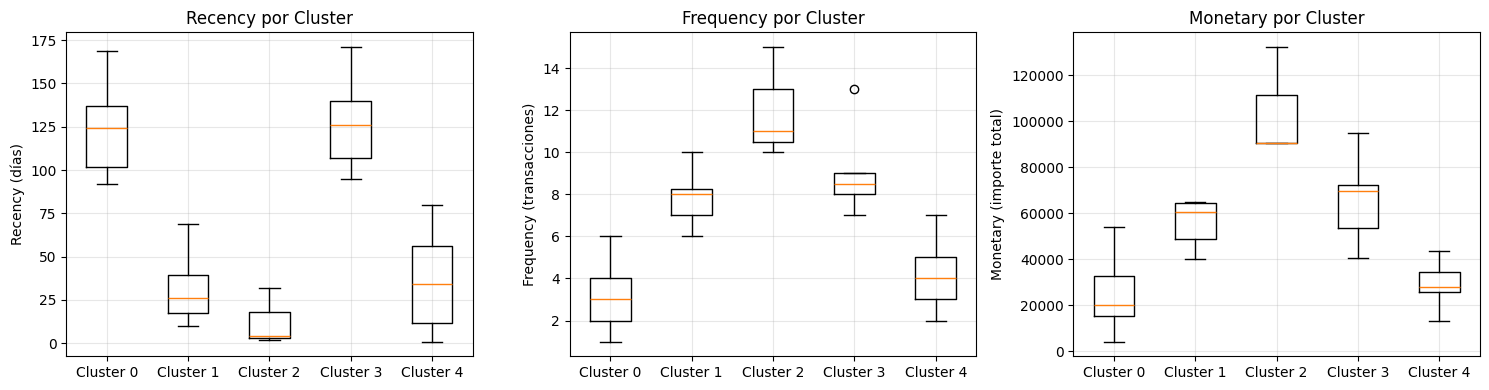


=== Interpretación de Clusters ===

Cluster 0 (22 clientes):
  - Recency promedio: 124.5 días
  - Frequency promedio: 3.2 transacciones
  - Monetary promedio: $23425.09

Cluster 1 (12 clientes):
  - Recency promedio: 31.1 días
  - Frequency promedio: 7.8 transacciones
  - Monetary promedio: $56831.33

Cluster 2 (3 clientes):
  - Recency promedio: 12.7 días
  - Frequency promedio: 12.0 transacciones
  - Monetary promedio: $104460.33

Cluster 3 (6 clientes):
  - Recency promedio: 127.2 días
  - Frequency promedio: 9.0 transacciones
  - Monetary promedio: $65942.33

Cluster 4 (20 clientes):
  - Recency promedio: 34.1 días
  - Frequency promedio: 4.1 transacciones
  - Monetary promedio: $29522.95


In [37]:


# Aplicar KMeans con k=3
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

print(f"\n=== KMeans aplicado con k={k_optimal} ===")
print(f"Silhouette Score: {silhouette_score(rfm_scaled, rfm['cluster']):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(rfm_scaled, rfm['cluster']):.4f}")

# Distribución de clientes por cluster
print("\nDistribución de clientes por cluster:")
print(rfm['cluster'].value_counts().sort_index())

# Perfilar cada cluster
print("\n=== Perfil de cada cluster ===")
cluster_profile = rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].agg(['mean', 'median', 'min', 'max'])
print(cluster_profile)

# Visualizar clusters (gráfico 3D simulado con pairplot)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rfm['recency'], rfm['frequency'], c=rfm['cluster'], 
                     s=rfm['monetary']/5, cmap='viridis', alpha=0.6, edgecolors='black')
plt.xlabel('Recency (días)')
plt.ylabel('Frequency (transacciones)')
plt.title('Segmentación de clientes KMeans (tamaño = Monetary)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar distribución de clusters por característica
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].boxplot([rfm[rfm['cluster']==i]['recency'].values for i in range(k_optimal)],
               tick_labels=[f'Cluster {i}' for i in range(k_optimal)])
axes[0].set_ylabel('Recency (días)')
axes[0].set_title('Recency por Cluster')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot([rfm[rfm['cluster']==i]['frequency'].values for i in range(k_optimal)],
               tick_labels=[f'Cluster {i}' for i in range(k_optimal)])
axes[1].set_ylabel('Frequency (transacciones)')
axes[1].set_title('Frequency por Cluster')
axes[1].grid(True, alpha=0.3)

axes[2].boxplot([rfm[rfm['cluster']==i]['monetary'].values for i in range(k_optimal)],
               tick_labels=[f'Cluster {i}' for i in range(k_optimal)])
axes[2].set_ylabel('Monetary (importe total)')
axes[2].set_title('Monetary por Cluster')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretación de clusters
print("\n=== Interpretación de Clusters ===")
for i in range(k_optimal):
    cluster_data = rfm[rfm['cluster']==i]
    print(f"\nCluster {i} ({len(cluster_data)} clientes):")
    print(f"  - Recency promedio: {cluster_data['recency'].mean():.1f} días")
    print(f"  - Frequency promedio: {cluster_data['frequency'].mean():.1f} transacciones")
    print(f"  - Monetary promedio: ${cluster_data['monetary'].mean():.2f}")

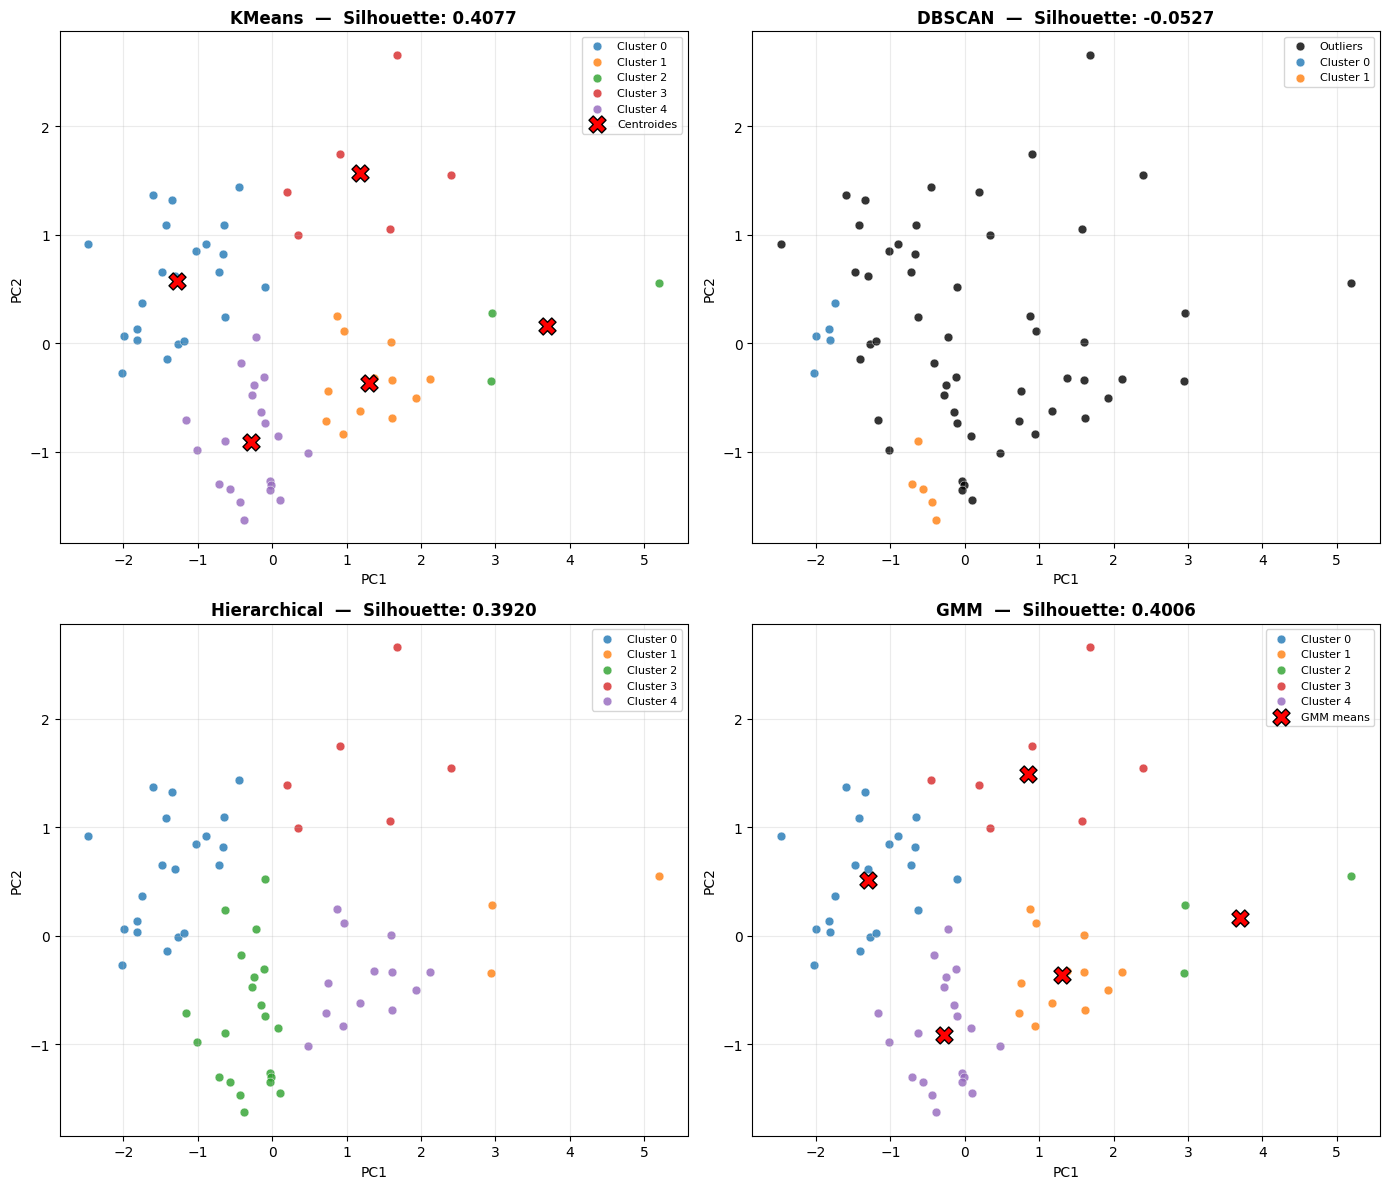

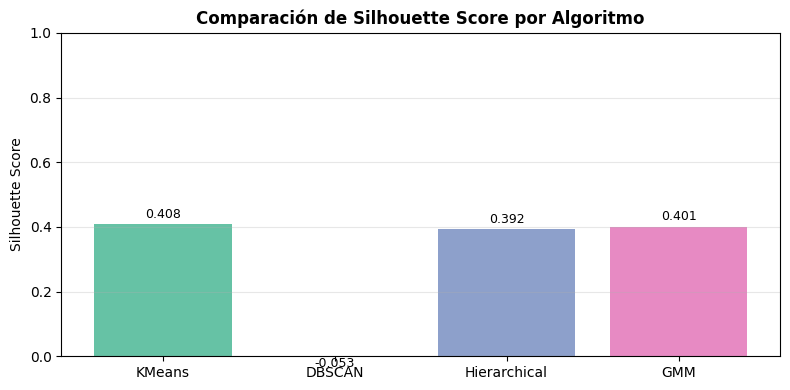

Silhouette scores:
 - KMeans: 0.4077
 - DBSCAN: -0.0527
 - Hierarchical: 0.3920
 - GMM: 0.4006


In [ ]:
# Comparar KMeans, DBSCAN, Agglomerative y GMM (usa rfm / rfm_scaled / scaler / k_optimal si existen)


# Parámetros
n_clusters = int(globals().get('k_optimal', globals().get('n_clusters', 3)))

# Proyección 2D para plotting
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(rfm_scaled)        
X_scaled = rfm_scaled                       

# Ajustar modelos
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

hc = AgglomerativeClustering(n_clusters=n_clusters)
labels_hc = hc.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

algos = {
    'KMeans': labels_km,
    'DBSCAN': labels_db,
    'Hierarchical': labels_hc,
    'GMM': labels_gmm
}

# Calcular Silhouette (manejar casos inválidos)
sil_scores = {}
for name, labels in algos.items():
    unique = set(labels)
    n_valid = len(unique - {-1}) if (-1 in unique) else len(unique)
    try:
        sil = silhouette_score(X_scaled, labels) if n_valid >= 2 else np.nan
    except Exception:
        sil = np.nan
    sil_scores[name] = sil

# Colores
cmap = plt.cm.tab10

# Scatter plots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
for ax, (name, labels) in zip(axes, algos.items()):
    uniq = np.unique(labels)
    for lab in uniq:
        mask = labels == lab
        color = 'k' if lab == -1 else cmap(int(lab % 10))
        lab_text = 'Outliers' if lab == -1 else f'Cluster {lab}'
        ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=[color], label=lab_text,
                   s=40, alpha=0.8, edgecolors='w', linewidth=0.4)
    # Centroides en el espacio 2D (proyección PCA)
    if name == 'KMeans':
        cent_scaled = kmeans.cluster_centers_
        cent_2d = pca.transform(cent_scaled)
        ax.scatter(cent_2d[:, 0], cent_2d[:, 1], c='red', marker='X', s=150, edgecolors='k', label='Centroides')
    if name == 'GMM' or name == 'GMM'.replace('GMM','GaussianMixture'):  # asegurar nombre
        cent_scaled = gmm.means_
        cent_2d = pca.transform(cent_scaled)
        ax.scatter(cent_2d[:, 0], cent_2d[:, 1], c='red', marker='X', s=150, edgecolors='k', label='GMM means')
    score = sil_scores[name]
    score_txt = f"{score:.4f}" if not np.isnan(score) else "n/a"
    ax.set_title(f"{name}  —  Silhouette: {score_txt}", fontweight='bold')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()

# Gráfico de barras con Silhouette scores
plt.figure(figsize=(8,4))
names = list(sil_scores.keys())
scores = [0 if np.isnan(sil_scores[n]) else sil_scores[n] for n in names]
bars = plt.bar(names, scores, color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    val = scores[i]
    txt = 'n/a' if np.isnan(sil_scores[names[i]]) else f"{val:.3f}"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, txt, ha='center', fontsize=9)
plt.title('Comparación de Silhouette Score por Algoritmo', fontweight='bold')
plt.ylabel('Silhouette Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Opcional: imprimir scores
print("Silhouette scores:")
for k, v in sil_scores.items():
    print(f" - {k}: {'n/a' if np.isnan(v) else f'{v:.4f}'}")

In [40]:
rfm.head()

,nombre_cliente,recency,frequency,monetary,cluster
0,Agustina Flores,4,15,132158,2
1,Agustina Gomez,108,2,9800,0
2,Agustina Lopez,59,5,29883,4
3,Agustina Martinez,96,3,18292,0
4,Bruno Castro,171,9,95030,3
